In [1]:
import numpy as np

def random_spin_field(N, M):
    return np.random.choice([-1, 1], size=(N, M))

random_spin_field(10, 10)

array([[ 1,  1,  1, -1, -1,  1, -1, -1,  1, -1],
       [-1,  1,  1,  1, -1, -1,  1,  1, -1,  1],
       [ 1, -1,  1, -1,  1,  1,  1,  1, -1, -1],
       [ 1,  1,  1,  1,  1,  1, -1, -1,  1, -1],
       [-1,  1, -1,  1, -1, -1, -1,  1,  1,  1],
       [-1,  1, -1,  1, -1, -1, -1, -1, -1, -1],
       [ 1,  1, -1, -1, -1,  1, -1, -1, -1,  1],
       [ 1,  1, -1, -1,  1,  1,  1,  1,  1, -1],
       [-1, -1, -1, -1, -1,  1,  1, -1, -1,  1],
       [-1,  1,  1, -1,  1, -1, -1,  1,  1, -1]])

In [2]:
A=np.random.rand(5,5)
A.shape

(5, 5)

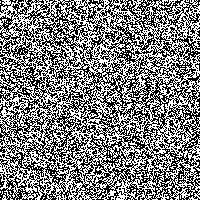

In [3]:
# pip install pillow
from PIL import Image

def display_spin_field(field):
    return Image.fromarray(np.uint8((field + 1) * 0.5 * 255))  # 0 ... 255

display_spin_field(random_spin_field(200, 200))

In [17]:
def ising_step(Z, beta=0.4):
    Z[0,:] = Z[-1,:] = Z[:,0] = Z[:,-1] = 0
    N = np.zeros(Z.shape, int)
    N[1:-1,1:-1]= (Z[0:-2,0:-2] + Z[0:-2,1:-1] + Z[0:-2,2:] +
                   Z[1:-1,0:-2]                + Z[1:-1,2:] +
                   Z[2:  ,0:-2] + Z[2:  ,1:-1] + Z[2:  ,2:])
    dE = 2 * N
    flip=(dE[1:-1,1:-1]<=0) ##| 
    flup= np.exp(-dE[1:-1,1:-1] * beta) > np.random.random(size=N[1:-1,1:-1].shape)
    Z[1:-1,1:-1][flip | flup] *= -1
    return Z

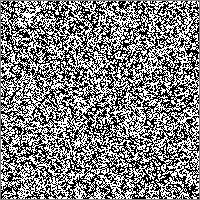

In [18]:
display_spin_field(ising_step(random_spin_field(200, 200)))

In [19]:
from ipywidgets import interact

def display_ising_sequence(images):
    def _show(frame=(0, len(images) - 1)):
        return display_spin_field(images[frame])
    return interact(_show)

In [32]:
images = [random_spin_field(200, 200)]
for i in range(100):
    images.append(ising_step(images[-1].copy()))
display_ising_sequence(images);

interactive(children=(IntSlider(value=50, description='frame'), Output()), _dom_classes=('widget-interact',))

### This is an example of a boolean mask on a numerical array

In [9]:
x1

array([[ 1,  5,  0,  3,  3],
       [ 2,  7,  9,  3,  5],
       [ 3,  2,  4,  7,  6],
       [ 8,  6,  8,  9, 10]])

In [10]:
flip = (x1<5)

In [11]:
flip

array([[ True, False,  True,  True,  True],
       [ True, False, False,  True, False],
       [ True,  True,  True, False, False],
       [False, False, False, False, False]])

In [12]:
x1[flip]=1

In [13]:
x1

array([[ 1,  5,  1,  1,  1],
       [ 1,  7,  9,  1,  5],
       [ 1,  1,  1,  7,  6],
       [ 8,  6,  8,  9, 10]])

In [36]:
def ising_step_J(Z, beta=0.4):
    Z[0,:] = Z[-1,:] = Z[:,0] = Z[:,-1] = 0
    N = np.zeros(Z.shape, int)
    N[1:-1,1:-1]= (Z[0:-2,0:-2] + Z[0:-2,1:-1] + Z[0:-2,2:] +
                   Z[1:-1,0:-2]                + Z[1:-1,2:] +
                   Z[2:  ,0:-2] + Z[2:  ,1:-1] + Z[2:  ,2:])
    dE = 2 * N
    flip=(dE[1:-1,1:-1]<=0) ##| 
    flup= np.exp(-dE[1:-1,1:-1] * beta) > np.random.random(size=N[1:-1,1:-1].shape)
    Z[1:-1,1:-1][flip | flup] *= -1
    print("Matrixes N,Z Internal")
    print(N)
    print(Z)
    print('')
    return Z

In [37]:
A=random_spin_field(10, 10)

In [38]:
A

array([[-1,  1, -1,  1, -1, -1,  1,  1, -1,  1],
       [-1,  1, -1,  1,  1, -1,  1,  1, -1, -1],
       [ 1, -1,  1,  1,  1,  1,  1,  1,  1, -1],
       [ 1, -1,  1,  1, -1, -1,  1,  1, -1,  1],
       [-1, -1,  1, -1, -1, -1,  1, -1,  1,  1],
       [-1,  1,  1, -1, -1,  1,  1,  1,  1, -1],
       [ 1,  1, -1,  1, -1,  1, -1,  1,  1,  1],
       [ 1,  1,  1,  1,  1, -1, -1, -1, -1, -1],
       [ 1,  1,  1, -1, -1, -1, -1,  1, -1, -1],
       [ 1,  1, -1, -1, -1,  1, -1, -1, -1,  1]])

In [39]:
B=ising_step_J(A)

Matrixes N,Z Internal
[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0 -1  3  3  3  5  3  3  3  0]
 [ 0  1  2  4  2  2  4  4  1  0]
 [ 0  1  0  2  0  2  2  4  3  0]
 [ 0  3  0  0 -4  0  2  6  1  0]
 [ 0  1  0 -2 -2 -2  2  4  3  0]
 [ 0  3  6  0  2 -2  2  0  1  0]
 [ 0  3  4  0 -2 -4 -2 -2  1  0]
 [ 0  3  3  3 -1 -3 -3 -5 -1  0]
 [ 0  0  0  0  0  0  0  0  0  0]]
[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0 -1 -1  1  1 -1  1  1  1  0]
 [ 0 -1  1  1  1  1  1  1 -1  0]
 [ 0 -1 -1  1  1 -1  1  1 -1  0]
 [ 0 -1 -1  1  1  1  1 -1  1  0]
 [ 0 -1 -1  1  1 -1  1  1  1  0]
 [ 0  1 -1 -1 -1 -1 -1 -1  1  0]
 [ 0  1 -1 -1 -1  1  1  1 -1  0]
 [ 0  1  1  1  1  1  1 -1  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]]



In [40]:
B

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, -1, -1,  1,  1, -1,  1,  1,  1,  0],
       [ 0, -1,  1,  1,  1,  1,  1,  1, -1,  0],
       [ 0, -1, -1,  1,  1, -1,  1,  1, -1,  0],
       [ 0, -1, -1,  1,  1,  1,  1, -1,  1,  0],
       [ 0, -1, -1,  1,  1, -1,  1,  1,  1,  0],
       [ 0,  1, -1, -1, -1, -1, -1, -1,  1,  0],
       [ 0,  1, -1, -1, -1,  1,  1,  1, -1,  0],
       [ 0,  1,  1,  1,  1,  1,  1, -1,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [41]:
C=ising_step_J(B)

Matrixes N,Z Internal
[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0 -1  1  3  3  5  3  3  1  0]
 [ 0 -3 -2  4  4  4  4  4  3  0]
 [ 0 -3  0  4  6  8  4  2  1  0]
 [ 0 -5 -2  2  4  4  2  6  1  0]
 [ 0 -3 -2 -2  0  2 -2  2  1  0]
 [ 0 -3 -2 -4 -2  0  2  4  1  0]
 [ 0  1  2 -2  0  0  0  0  1  0]
 [ 0  1  1 -1  1  3  3  3 -1  0]
 [ 0  0  0  0  0  0  0  0  0  0]]
[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1 -1  1  1 -1  1  1 -1  0]
 [ 0  1 -1  1  1  1  1  1 -1  0]
 [ 0  1  1  1  1 -1  1  1 -1  0]
 [ 0  1  1 -1  1  1  1 -1 -1  0]
 [ 0  1  1 -1 -1  1 -1  1 -1  0]
 [ 0 -1  1  1  1  1  1 -1 -1  0]
 [ 0  1 -1  1  1 -1 -1 -1  1  0]
 [ 0 -1 -1 -1 -1  1  1 -1 -1  0]
 [ 0  0  0  0  0  0  0  0  0  0]]



In [35]:
for i in range(0,5):
    print(i)

0
1
2
3
4
